In [1]:
!pip3 install pandas
!pip3 install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import json

In [3]:
df = pd.read_csv('./london_weather.csv')

In [4]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [7]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [8]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [9]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

19:31:28 - cmdstanpy - INFO - Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [11]:
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.560387,7.744738,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.612998,7.750885,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.265751,7.725494,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.451903,7.949572,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.442867,7.827647,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.734442,10.924286,12.865565,13.683201,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.976027,10.900508,12.865138,13.683793,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.717764,10.937828,12.864711,13.684385,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.770842,10.764081,12.864617,13.684977,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


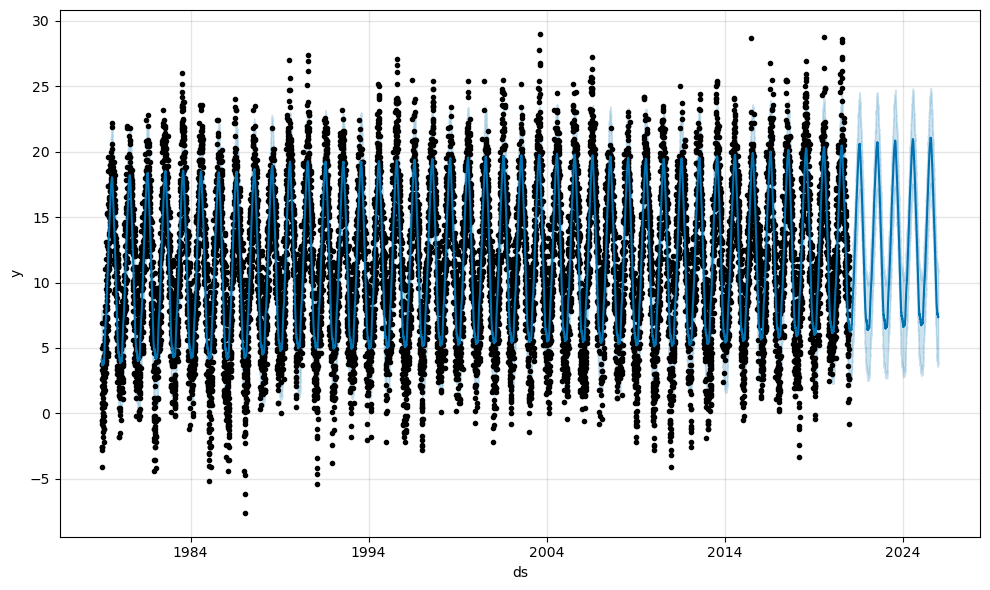

In [13]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [14]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [15]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

19:31:35 - cmdstanpy - INFO - Chain [1] start processing
19:31:37 - cmdstanpy - INFO - Chain [1] done processing
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
19:31:40 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


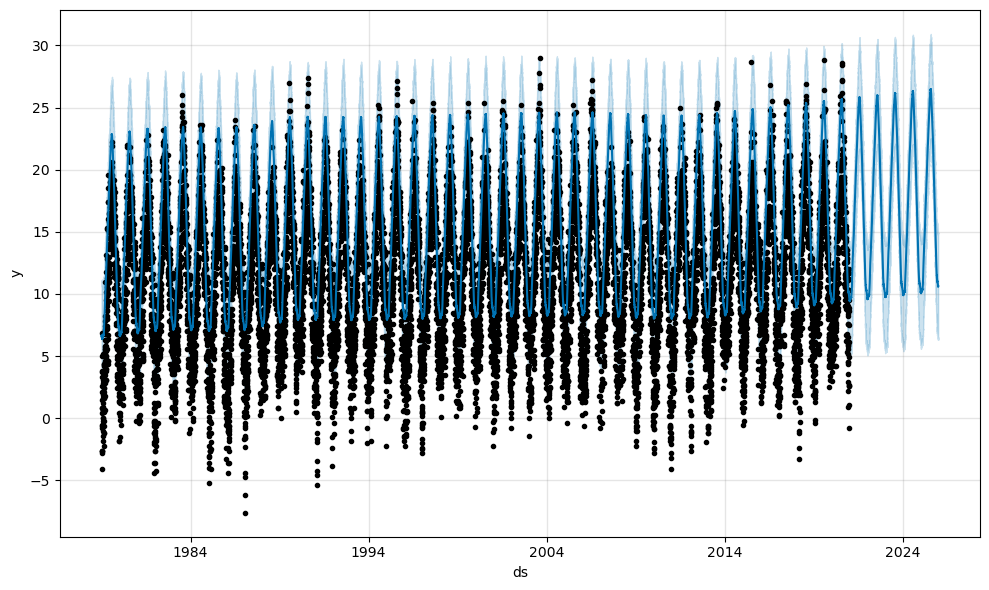

In [17]:
fig_max = model.plot(forecast_max)

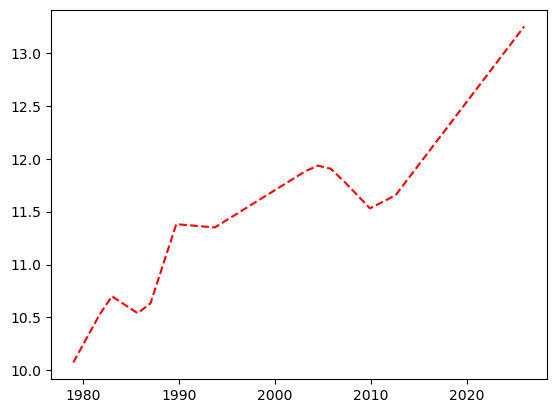

In [18]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [19]:
forecast_reset_index = forecast.set_index('ds')

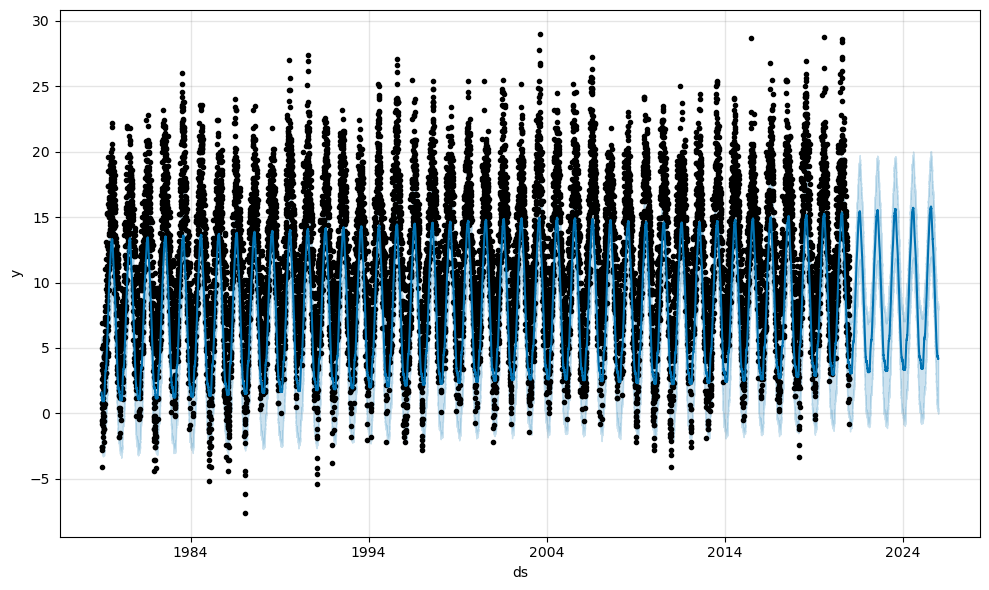

In [20]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

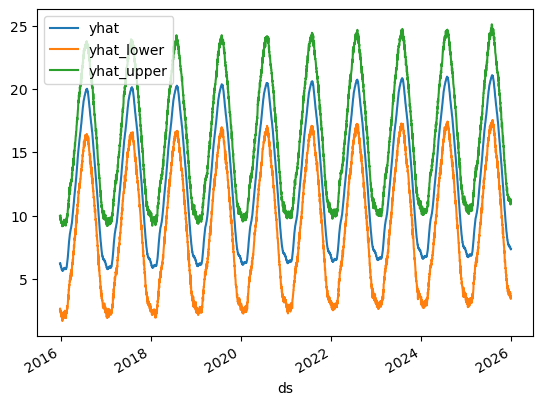

In [21]:
forecast_reset_index[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [22]:
# Prophet forecast with smaller dataseries
# 2016 - 2020, 2021- 2025 prediction

In [ ]:
five_year_df = df.loc[df['date'] >= '2016']
five_year_df


In [ ]:
five_year_mean_df = five_year_df[['date', 'mean_temp']]
five_year_mean_df = five_year_mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [ ]:
model_5_year_mean = Prophet()
model_5_year_mean.fit(five_year_mean_df)
five_year_future_mean = model_5_year_mean.make_future_dataframe(periods=1826)

In [ ]:
forecast_5_year_mean = model_5_year_mean.predict(five_year_future_mean)
forecast_mean_comparison = forecast.loc[forecast['ds'] >= '2016']
model


In [ ]:
fig_5_year_mean = model_5_year_mean.plot(forecast_5_year_mean)

In [ ]:
five_year_max_df = five_year_df[['date', 'max_temp']]
five_year_max_df = five_year_max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

five_year_min_df = five_year_df[['date', 'min_temp']]
five_year_min_df = five_year_min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [ ]:
model_5_year_max = Prophet()
model_5_year_max.fit(five_year_max_df)
five_year_future_max = model_5_year_max.make_future_dataframe(periods=1825)

model_5_year_min = Prophet()
model_5_year_min.fit(five_year_min_df)
five_year_future_min = model_5_year_min.make_future_dataframe(periods=1825)

In [ ]:
forecast_5_year_max = model_5_year_max.predict(five_year_future_max)

forecast_5_year_min = model_5_year_min.predict(five_year_future_min)

In [ ]:
fig_5_year_max = model_5_year_max.plot(forecast_5_year_max)

In [ ]:
fig_5_year_min = model_5_year_min.plot(forecast_5_year_min)

In [23]:
# MAPE calculation using weather API

In [24]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [25]:
get_api.json()

[{'name': 'London',
  'local_names': {'es': 'Londres',
   'zu': 'ILondon',
   'nv': 'Tooh Dineʼé Bikin Haalʼá',
   'my': 'လန်ဒန်မြို့',
   'sn': 'London',
   'ht': 'Lonn',
   'ko': '런던',
   'mr': 'लंडन',
   'it': 'Londra',
   'kl': 'London',
   'bi': 'London',
   'eu': 'Londres',
   'ee': 'London',
   'sw': 'London',
   'vi': 'Luân Đôn',
   'kw': 'Loundres',
   'hu': 'London',
   'tg': 'Лондон',
   'hr': 'London',
   'feature_name': 'London',
   'lb': 'London',
   'ca': 'Londres',
   'gv': 'Lunnin',
   'nn': 'London',
   'eo': 'Londono',
   'sk': 'Londýn',
   'fi': 'Lontoo',
   'ja': 'ロンドン',
   'ms': 'London',
   'fa': 'لندن',
   'el': 'Λονδίνο',
   'bo': 'ལོན་ཊོན།',
   'mg': 'Lôndôna',
   'ku': 'London',
   'gd': 'Lunnainn',
   'sq': 'Londra',
   'am': 'ለንደን',
   'tr': 'Londra',
   'ia': 'London',
   'cu': 'Лондонъ',
   'sm': 'Lonetona',
   'kk': 'Лондон',
   'oc': 'Londres',
   'id': 'London',
   'uk': 'Лондон',
   'ml': 'ലണ്ടൻ',
   'bs': 'London',
   'wo': 'Londar',
   'mt': 'Londra

In [26]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'es': 'Londres',
  'zu': 'ILondon',
  'nv': 'Tooh Dineʼé Bikin Haalʼá',
  'my': 'လန်ဒန်မြို့',
  'sn': 'London',
  'ht': 'Lonn',
  'ko': '런던',
  'mr': 'लंडन',
  'it': 'Londra',
  'kl': 'London',
  'bi': 'London',
  'eu': 'Londres',
  'ee': 'London',
  'sw': 'London',
  'vi': 'Luân Đôn',
  'kw': 'Loundres',
  'hu': 'London',
  'tg': 'Лондон',
  'hr': 'London',
  'feature_name': 'London',
  'lb': 'London',
  'ca': 'Londres',
  'gv': 'Lunnin',
  'nn': 'London',
  'eo': 'Londono',
  'sk': 'Londýn',
  'fi': 'Lontoo',
  'ja': 'ロンドン',
  'ms': 'London',
  'fa': 'لندن',
  'el': 'Λονδίνο',
  'bo': 'ལོན་ཊོན།',
  'mg': 'Lôndôna',
  'ku': 'London',
  'gd': 'Lunnainn',
  'sq': 'Londra',
  'am': 'ለንደን',
  'tr': 'Londra',
  'ia': 'London',
  'cu': 'Лондонъ',
  'sm': 'Lonetona',
  'kk': 'Лондон',
  'oc': 'Londres',
  'id': 'London',
  'uk': 'Лондон',
  'ml': 'ലണ്ടൻ',
  'bs': 'London',
  'wo': 'Londar',
  'mt': 'Londra',
  'ba': 'Лондон',
  'so': 'London',
  'br': 'Lo

In [27]:
london['lat']

51.5073219

In [28]:
london['lon']

-0.1276474

In [29]:
london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat=51.5073219&lon=-0.1276474&date=2016-01-01&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
response = requests.get(london_api)
response

'https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric'

In [30]:
def generate_dates(start_date, end_date):
    dates = []
    target_date = start_date
    while target_date <= end_date:
        dates.append(target_date)
        target_date += datetime.timedelta(days=1)
    return dates

def get_api_london(date):
    london_api = "https://api.openweathermap.org/data/3.0/onecall/day_summary?lat={lat}&lon={lon}&date={date}&tz=+05:00&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
    response = requests.get(london_api.format(lat=51.5074, lon=0.1278, date=date.strftime('%Y-%m-%d')))
    return response

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2020, 1, 15)
dates = generate_dates(start_date, end_date)
min_temps = []
max_temps = []
mean_temps = []

for date in dates:
    api_response = get_api_london(date)
    if api_response.status_code == 200:
        data = api_response.json()
        min_temp = data['temperature']['min']
        max_temp = data['temperature']['max']
        mean_temp = data['temperature']['afternoon']
        min_temps.append(min_temp)
        max_temps.append(max_temp)
        mean_temps.append(mean_temp)
    else:
        print(f"Error: Unable to fetch data for date {date}")

    time.sleep(2)
    
weather_df = pd.DataFrame({
    'ds': dates,
    'Minimum Temperature (C)': min_temps,
    'Maximum Temperature (C)': max_temps,
    'Average Temperature (C)': mean_temps
})

weather_df


,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C)
0,1707480000,9.38,11.45,11.18
1,1707566400,7.00,11.00,10.56
2,1707652800,5.45,8.02,8.02
3,1707739200,3.77,9.68,9.08
4,1707825600,3.72,9.48,8.50
5,1707912000,3.29,9.09,7.49
6,1707998400,9.36,11.23,11.23
7,1708084800,9.51,12.92,11.32


ds                           int64
Minimum Temperature (C)    float64
Maximum Temperature (C)    float64
Average Temperature (C)    float64
dtype: object

In [34]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df.head(15)

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-09,9.38,11.45,11.18,13.025662,3.158820,10.200587,12.832456,13.199799,-6.266793,...,-0.008151,-0.008151,-0.008151,-6.258642,-6.258642,-6.258642,0.0,0.0,0.0,6.758869
1,2024-02-10,7.00,11.00,10.56,13.025988,3.131754,10.453576,12.832671,13.200292,-6.293434,...,-0.028972,-0.028972,-0.028972,-6.264461,-6.264461,-6.264461,0.0,0.0,0.0,6.732555
2,2024-02-11,5.45,8.02,8.02,13.026314,2.971332,10.274235,12.832886,13.200784,-6.271805,...,-0.002883,-0.002883,-0.002883,-6.268922,-6.268922,-6.268922,0.0,0.0,0.0,6.754509
3,2024-02-12,3.77,9.68,9.08,13.026640,2.998895,10.252161,12.833101,13.201277,-6.280234,...,-0.009022,-0.009022,-0.009022,-6.271213,-6.271213,-6.271213,0.0,0.0,0.0,6.746406
4,2024-02-13,3.72,9.48,8.50,13.026966,3.410967,10.447803,12.833316,13.201770,-6.291038,...,-0.020539,-0.020539,-0.020539,-6.270499,-6.270499,-6.270499,0.0,0.0,0.0,6.735928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,3.745773,10.880952,12.833711,13.632300,-5.840213,...,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,NaN,NaN,NaN,13.249899,3.520061,11.262575,12.833539,13.633124,-5.840961,...,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,NaN,NaN,NaN,13.250225,3.687253,11.185377,12.833367,13.633949,-5.876358,...,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,NaN,NaN,NaN,13.250551,3.430861,10.963879,12.833194,13.634774,-5.919392,...,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


In [35]:
mape_df = mape_df[["ds", "Average Temperature (C)", "Minimum Temperature (C)","Maximum Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df.head(15)

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,trend_lower,trend_upper
0,2024-02-09,9.38,11.45,11.18,13.025662,12.832456,13.199799
1,2024-02-10,7.00,11.00,10.56,13.025988,12.832671,13.200292
2,2024-02-11,5.45,8.02,8.02,13.026314,12.832886,13.200784
3,2024-02-12,3.77,9.68,9.08,13.026640,12.833101,13.201277
4,2024-02-13,3.72,9.48,8.50,13.026966,12.833316,13.201770
...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,12.833711,13.632300
17127,2025-12-28,NaN,NaN,NaN,13.249899,12.833539,13.633124
17128,2025-12-29,NaN,NaN,NaN,13.250225,12.833367,13.633949
17129,2025-12-30,NaN,NaN,NaN,13.250551,12.833194,13.634774


In [36]:
#MAPE - mean temp

In [37]:
dates = mape_df['ds']

actual_values  = mape_df['Average Temperature (C)']
forecasted_values = mape_df['trend']

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)


C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\979071675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Average Temperature (C)'] - mape_df['trend'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\979071675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Average Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\979071675.py:3: SettingWithCopyWarning: 
A value i

<Axes: xlabel='ds'>

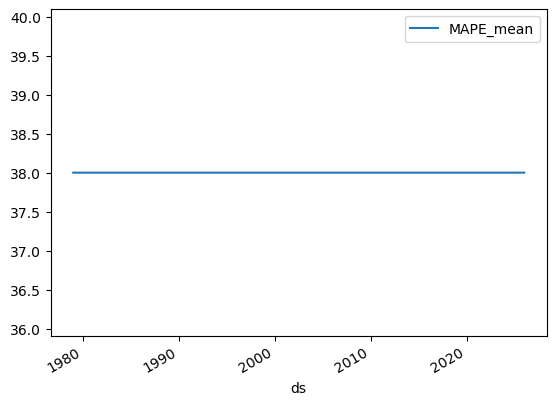

In [38]:
x= df['Date']
y = df['MAPE']

plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Avg Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()



In [39]:
#MAPE - min temp

In [40]:
x= df['Date']
y = df['MAPE']

actual_values  = mape_df['Minimum Temperature (C)']
forecasted_values = mape_df['trend_lower'] 

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)


C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\331237815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Minimum Temperature (C)'] - mape_df['trend_lower'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\331237815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Minimum Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\331237815.py:3: SettingWithCopyWarning: 
A v

<Axes: xlabel='ds'>

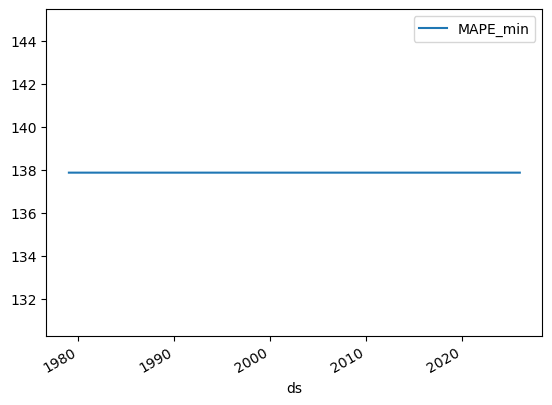

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Min Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


In [42]:
#MAPE - max temp

In [43]:
x= df['Date']
y = df['MAPE']

actual_values  = mape_df['Maximum Temperature (C)']
forecasted_values = mape_df['trend_upper'] 

def calculate_mape(actual, forecast):
    return (abs((actual - forecast) / actual)) * 100

mape_values = [calculate_mape(actual, forecast) for actual, forecast in zip(actual_values, forecasted_values)]

data = {'Date': dates, 'Actual': actual_values, 'Forecasted': forecasted_values, 'MAPE': mape_values}
df= pd.DataFrame(data)
df.head(15)


C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\1260846742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Absolute Error'] = abs(mape_df['Maximum Temperature (C)'] - mape_df['trend_upper'])
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\1260846742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Maximum Temperature (C)']) * 100
C:\Users\jnpre\AppData\Local\Temp\ipykernel_11224\1260846742.py:3: SettingWithCopyWarning: 


<Axes: xlabel='ds'>

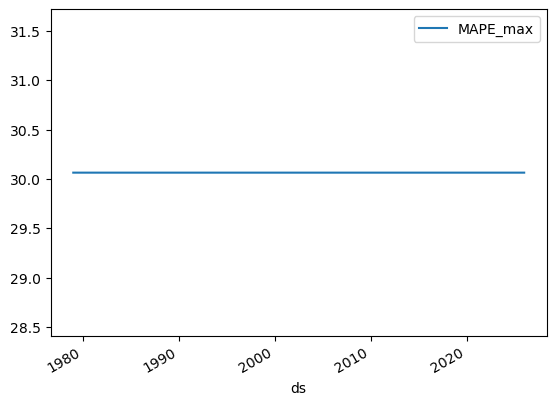

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(x,y, marker='o')
plt.title('Mean Absolute Percentage Error (MAPE) - Max Temp')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()



In [45]:
##Cross Validation

In [46]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/80 [00:00<?, ?it/s]

20:14:42 - cmdstanpy - INFO - Chain [1] start processing
20:14:42 - cmdstanpy - INFO - Chain [1] done processing
20:14:42 - cmdstanpy - INFO - Chain [1] start processing
20:14:43 - cmdstanpy - INFO - Chain [1] done processing
20:14:43 - cmdstanpy - INFO - Chain [1] start processing
20:14:43 - cmdstanpy - INFO - Chain [1] done processing
20:14:43 - cmdstanpy - INFO - Chain [1] start processing
20:14:43 - cmdstanpy - INFO - Chain [1] done processing
20:14:44 - cmdstanpy - INFO - Chain [1] start processing
20:14:44 - cmdstanpy - INFO - Chain [1] done processing
20:14:44 - cmdstanpy - INFO - Chain [1] start processing
20:14:44 - cmdstanpy - INFO - Chain [1] done processing
20:14:45 - cmdstanpy - INFO - Chain [1] start processing
20:14:45 - cmdstanpy - INFO - Chain [1] done processing
20:14:45 - cmdstanpy - INFO - Chain [1] start processing
20:14:45 - cmdstanpy - INFO - Chain [1] done processing
20:14:46 - cmdstanpy - INFO - Chain [1] start processing
20:14:46 - cmdstanpy - INFO - Chain [1]

In [47]:
prophet_validation

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1981-01-26,4.652565,1.435487,7.992939,6.3,1981-01-25
1,1981-01-27,4.737007,1.595379,7.862095,8.4,1981-01-25
2,1981-01-28,4.819212,1.510197,8.225057,7.2,1981-01-25
3,1981-01-29,4.863783,1.516897,8.178502,7.0,1981-01-25
4,1981-01-30,4.620855,1.566402,7.936066,0.1,1981-01-25
...,...,...,...,...,...,...
29125,2020-12-27,6.717418,3.102457,10.365946,7.5,2020-01-01
29126,2020-12-28,6.700298,2.886772,10.370804,1.1,2020-01-01
29127,2020-12-29,6.652531,3.136533,10.311678,2.6,2020-01-01
29128,2020-12-30,6.682577,3.206148,10.345416,2.7,2020-01-01


In [48]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.292955,2.879749,2.307591,0.171572,0.294249,0.789302
1,38 days,8.234724,2.869621,2.300345,0.170069,0.295072,0.790550
2,39 days,8.193117,2.862362,2.295865,0.169223,0.295465,0.792482
3,40 days,8.243258,2.871107,2.304726,0.170174,0.297539,0.792997
4,41 days,8.255745,2.873281,2.307808,0.170174,0.297949,0.792825
...,...,...,...,...,...,...,...
324,361 days,9.010016,3.001669,2.422599,0.185046,0.302320,0.773601
325,362 days,9.044015,3.007327,2.426777,0.184527,0.303167,0.773176
326,363 days,8.994570,2.999095,2.417881,0.184104,0.302354,0.774382
327,364 days,8.986715,2.997785,2.416946,0.183212,0.302255,0.774725


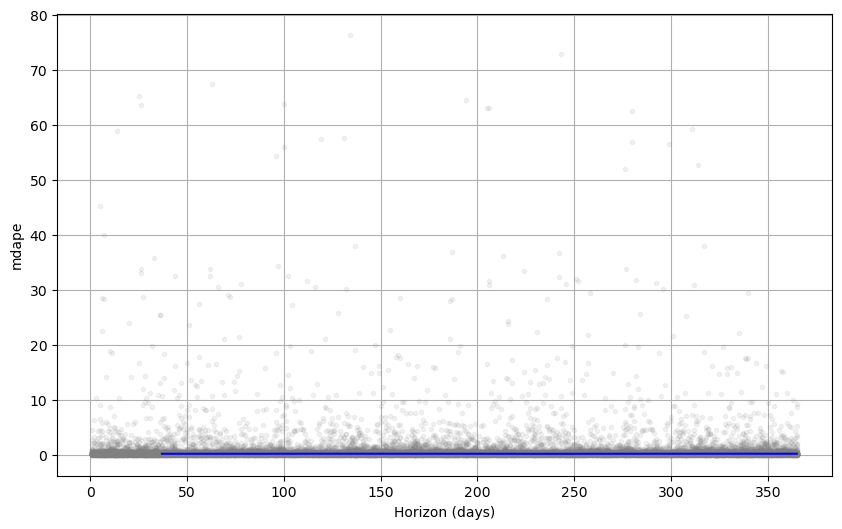

In [49]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

(0.0, 1.0)

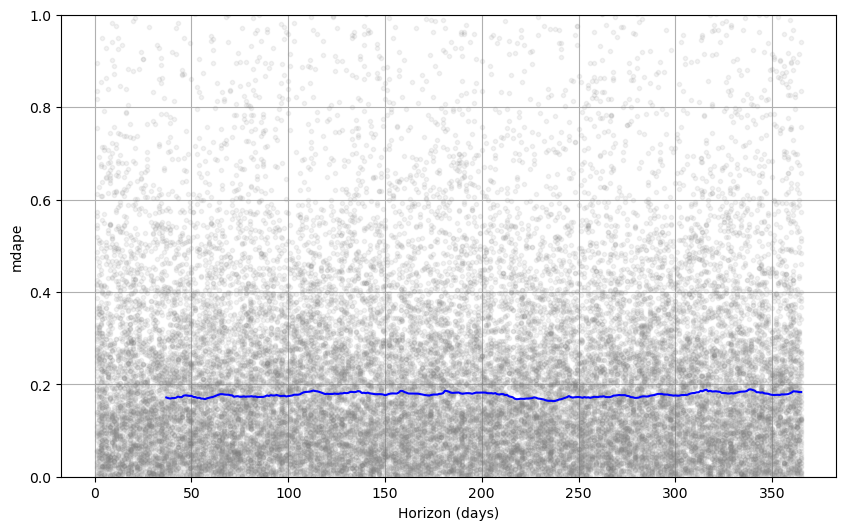

In [50]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [51]:
# Over time the changes stay consistent around 18%